In [2]:
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib as mpl
import cartopy.crs as ccrs
import numpy as np
import cftime

In [3]:
hgt = xr.open_mfdataset('/home/data/20CR/monthly/hgt/hgt.mon.mean.nc')

In [4]:
hgt500 = hgt['hgt'].sel(level=500, time=slice('1920', '2020'))

In [5]:
hgt500.load()

<xarray.DataArray 'hgt' (time: 1140, lat: 91, lon: 180)> Size: 75MB
array([[[4987.527 , 4987.527 , 4987.527 , ..., 4987.527 , 4987.527 ,
         4987.527 ],
        [4996.8706, 4996.949 , 4997.0366, ..., 4996.5913, 4996.684 ,
         4996.782 ],
        [5007.893 , 5008.119 , 5008.3843, ..., 5007.2817, 5007.477 ,
         5007.6724],
        ...,
        [5113.8105, 5114.0894, 5114.382 , ..., 5113.033 , 5113.276 ,
         5113.531 ],
        [5113.225 , 5113.0977, 5112.9736, ..., 5113.653 , 5113.5   ,
         5113.3667],
        [5113.227 , 5113.227 , 5113.227 , ..., 5113.227 , 5113.227 ,
         5113.227 ]],

       [[4915.1963, 4915.1963, 4915.1963, ..., 4915.1963, 4915.1963,
         4915.1963],
        [4922.534 , 4922.1216, 4921.695 , ..., 4923.7544, 4923.3594,
         4922.952 ],
        [4937.979 , 4937.005 , 4936.0273, ..., 4940.8477, 4939.91  ,
         4938.9473],
...
        [4904.9106, 4903.862 , 4902.7817, ..., 4907.893 , 4906.9224,
         4905.9297],
        [4881.9375, 4880.959 , 4879.9766, ..., 4884.777 , 4883.8525,
         4882.901 ],
        [4869.9497, 4869.9497, 4869.9497, ..., 4869.9497, 4869.9497,
         4869.9497]],

       [[5136.0806, 5136.0806, 5136.0806, ..., 5136.0806, 5136.0806,
         5136.0806],
        [5122.8584, 5122.625 , 5122.395 , ..., 5123.672 , 5123.384 ,
         5123.1133],
        [5107.7007, 5107.3237, 5107.0146, ..., 5109.113 , 5108.594 ,
         5108.121 ],
        ...,
        [4925.5117, 4925.137 , 4924.7876, ..., 4926.8037, 4926.338 ,
         4925.9067],
        [4916.275 , 4915.7036, 4915.154 , ..., 4918.0244, 4917.4326,
         4916.8457],
        [4918.323 , 4918.323 , 4918.323 , ..., 4918.323 , 4918.323 ,
         4918.323 ]]], shape=(1140, 91, 180), dtype=float32)
Coordinates:
  * lat      (lat) float32 364B 90.0 88.0 86.0 84.0 ... -84.0 -86.0 -88.0 -90.0
    level    float32 4B 500.0
  * lon      (lon) float32 720B 0.0 2.0 4.0 6.0 8.0 ... 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 9kB 1920-01-01 1920-02-01 ... 2014-12-01
Attributes: (12/17)
    cell_methods:      time: mean (monthly from 6-hourly values)
    long_name:         Monthly Geopotential Heights on Pressure Levels
    units:             m
    precision:         0
    GRIB_id:           7
    GRIB_name:         HGT
    ...                ...
    standard_name:     geopotential_height
    valid_range:       [-1500. 60000.]
    statistic_method:  Ensemble mean is calculated by averaging over all 56 e...
    GridType:          Cylindrical Equidistant Projection Grid
    datum:             wgs84
    actual_range:      [ -289.483 32742.3  ]

In [6]:
hgt500_mean = hgt500.mean('time')

## Cartopy Coordinate Reference System (CCRS)

The CCRS controls map projections in plotting. These are easy to work with
inside the xarray plotting functions themselves. When working with projections, its usually a good idea
to specify both a transform, which specifies what projection the data are currently in along with
the projection that you want things plotted in.

You specify these with the transform argument in plot and the projection argument in the
subplot_kws dictionary.

Longer description in the [docs](https://scitools.org.uk/cartopy/docs/v0.20/tutorials/understanding_transform.html).

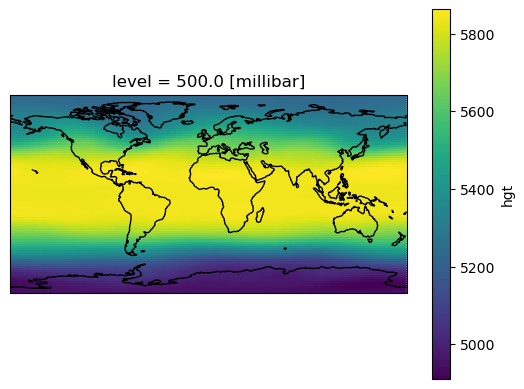

In [7]:
hgt_global_plot = hgt500_mean.plot(transform=ccrs.PlateCarree(),
                                   subplot_kws={'projection': ccrs.PlateCarree()})

# Sidenote: if you save the output of the xarray plot you can easily access the axes of the figure.
hgt_global_plot.axes.coastlines()

Here's a new example with a different projection. Note that we keep the transform the same, the data we are plotting hasn't 
changed we just want the way it is plotted to be different. The Cartopy package handles all the heavy lifting of figuring out
how to transform the data to be properly plotted under the new projection. Here we choose an Orthographic projection.

The cartopy package has a list of available projections here: [link](https://scitools.org.uk/cartopy/docs/v0.15/crs/projections.html).

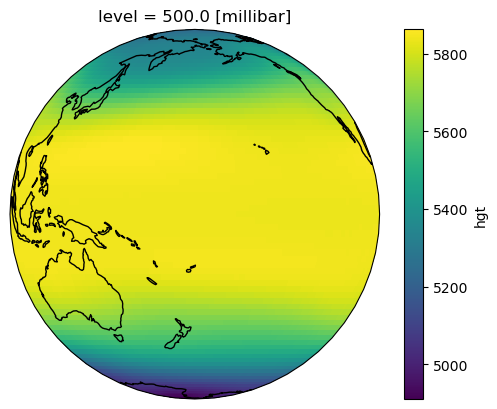

In [8]:
hgt_global_new_proj = hgt500_mean.plot(transform=ccrs.PlateCarree(),
                                   subplot_kws={'projection': ccrs.Orthographic(central_longitude=-180)})

hgt_global_new_proj.axes.coastlines()

## Xarray Plotting Arguments

### Discrete Colorbars

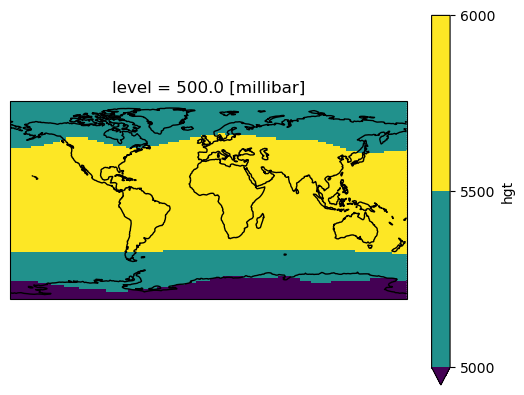

In [9]:
# Directly specify ranges for a discrete colorbar using the levels argument
hgt_global_plot = hgt500_mean.plot(transform=ccrs.PlateCarree(),
                                   levels=[5000, 5500, 6000],
                                   subplot_kws={'projection': ccrs.PlateCarree()})

hgt_global_plot.axes.coastlines()

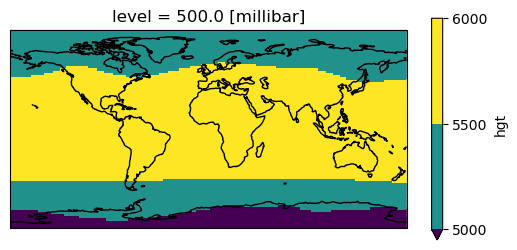

In [10]:
# We can shrink the colorbar to better match the plot.
hgt_global_plot = hgt500_mean.plot(transform=ccrs.PlateCarree(),
                                   levels=[5000, 5500, 6000],
                                   subplot_kws={'projection': ccrs.PlateCarree()},
                                  cbar_kwargs={'shrink': 0.6})

hgt_global_plot.axes.coastlines()

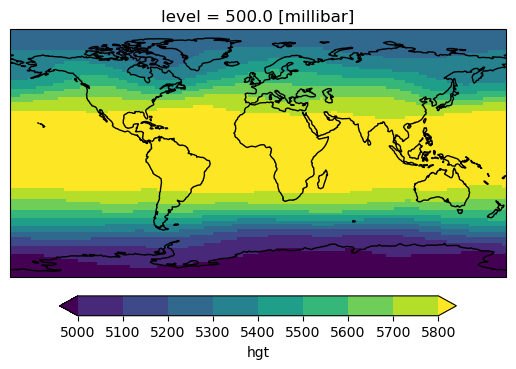

In [11]:
# Can create fig and ax objects using subplot with the desired projection, then add the xarray plot.
# And, there are many colorbar adjustments we can make by passing to cbar_kwargs.

fig, ax = plt.subplots(subplot_kw=dict(projection=ccrs.PlateCarree()))
hgt_global_plot = hgt500_mean.plot(transform=ccrs.PlateCarree(),
                                   ax=ax,
                                   levels=np.linspace(5000, 5800, 9), 
                                   cbar_kwargs={'shrink': 0.8,
                                                'orientation': 'horizontal',
                                                'pad': 0.05})

ax.coastlines();

### Polar Stereographic Projections

We can use `ccrs.NorthPolarStereo()` and `ccrs.SouthPolarStereo()` to get good plots centered on the two poles.

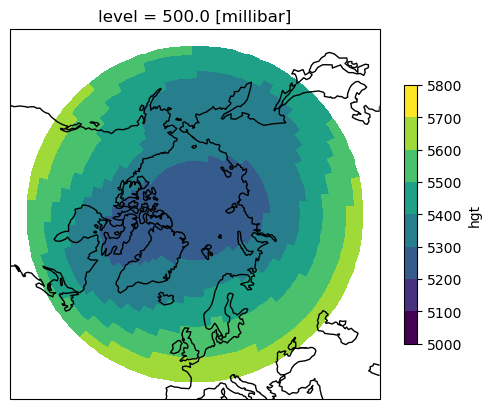

In [12]:
# Can create fig and ax objects using subplot with the desired projection, then add the xarray plot.
# And, there are many colorbar adjustments we can make by passing to cbar_kwargs. 

fig, ax = plt.subplots(subplot_kw=dict(projection=ccrs.NorthPolarStereo()))
hgt_global_plot = hgt500_mean.sel(lat = slice(90, 45)).plot(transform=ccrs.PlateCarree(),
                                   ax=ax,
                                   levels=np.linspace(5000, 5800, 9), 
                                   cbar_kwargs={'shrink': 0.7})

ax.coastlines();

It's annoying that we have the block extending around the plot circle.
The below code borrowed from this [link](https://nordicesmhub.github.io/NEGI-Abisko-2019/training/example_NorthPolarStereo_projection.html)
fixes that.

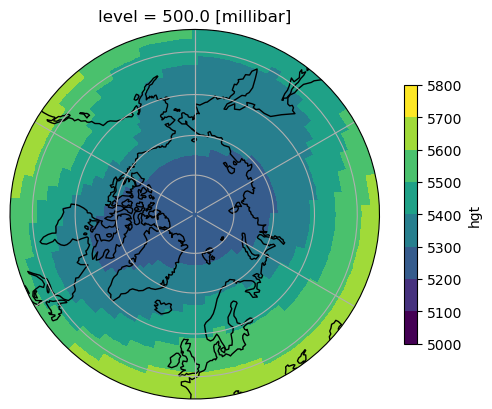

In [13]:
import matplotlib.path as mpath

fig, ax = plt.subplots(subplot_kw=dict(projection=ccrs.NorthPolarStereo()))
hgt_global_plot = hgt500_mean.sel(lat = slice(90, 45)).plot(transform=ccrs.PlateCarree(),
                                   ax=ax,
                                   levels=np.linspace(5000, 5800, 9), 
                                   cbar_kwargs={'shrink': 0.7})

ax.coastlines()

# The set extent command is useful for limiting the range of the data that is plotted. Note that if you
# don't also slice the data the whole dataset is plotted before things are "zoomed" to produce the final
# plot, so it's usually a good idea to perform slicing on the data as well, as I did above. In set_extent
# you should also supply a crs, here we're giving extents in longitude latitude coordinates so we use
# the PlateCarree() crs.
ax.set_extent([-180, 180, 45, 90], ccrs.PlateCarree())

# Borrowed code from 
# https://nordicesmhub.github.io/NEGI-Abisko-2019/training/example_NorthPolarStereo_projection.html
# to restrict the plot to the circle. 
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)
ax.gridlines();

### More Fun with cmaps

In [19]:
month_means = hgt500.groupby('time.month').mean('time')
hgt500_anoms = hgt500.groupby('time.month') - month_means

If xarray detects positive and negative values it often defaults to a red-blue
colorscheme when plotting. This is known as a diverging colormap. 

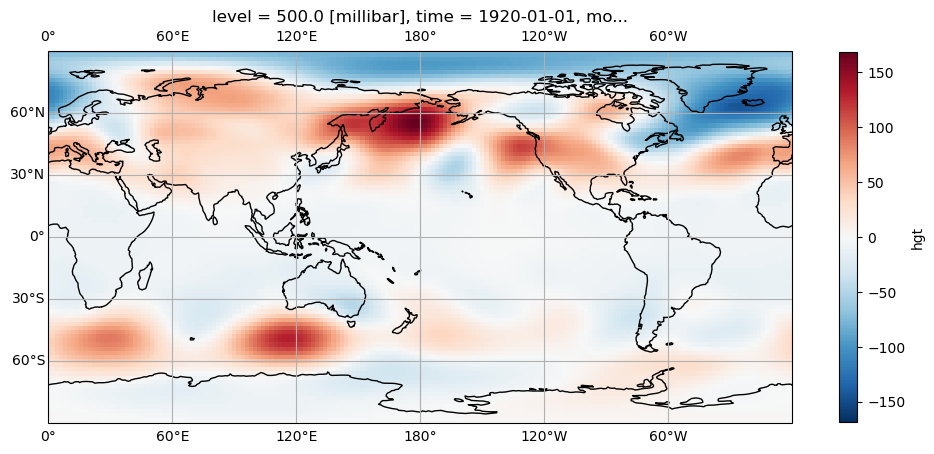

In [15]:
cmap_plot = (hgt500_anoms.sel(time='1920-01-01').
             plot(figsize=(12, 8),
                  transform=ccrs.PlateCarree(),
                  subplot_kws={'projection': ccrs.PlateCarree(central_longitude=180)},
                  cbar_kwargs={'shrink': 0.6}))

cmap_plot.axes.coastlines()
# add gridlines with labels
cmap_plot.axes.gridlines(draw_labels=True)

`Matplotlib`
has a number of different options for different colormaps: [link](https://matplotlib.org/stable/users/explain/colors/colormaps.html).
You can add different choices of colormap using the `cmap` argument in `.plot()`.

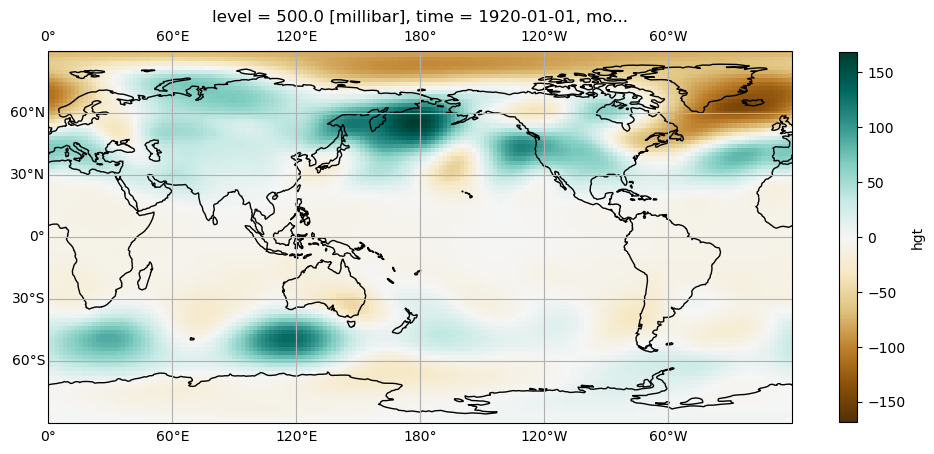

In [16]:
cmap_plot2 = (hgt500_anoms.sel(time='1920-01-01').
             plot(figsize=(12, 8),
                  cmap='BrBG',
                  transform=ccrs.PlateCarree(),
                  subplot_kws={'projection': ccrs.PlateCarree(central_longitude=180)},
                  cbar_kwargs={'shrink': 0.6}))

cmap_plot2.axes.coastlines()
# add gridlines with labels
cmap_plot2.axes.gridlines(draw_labels=True)

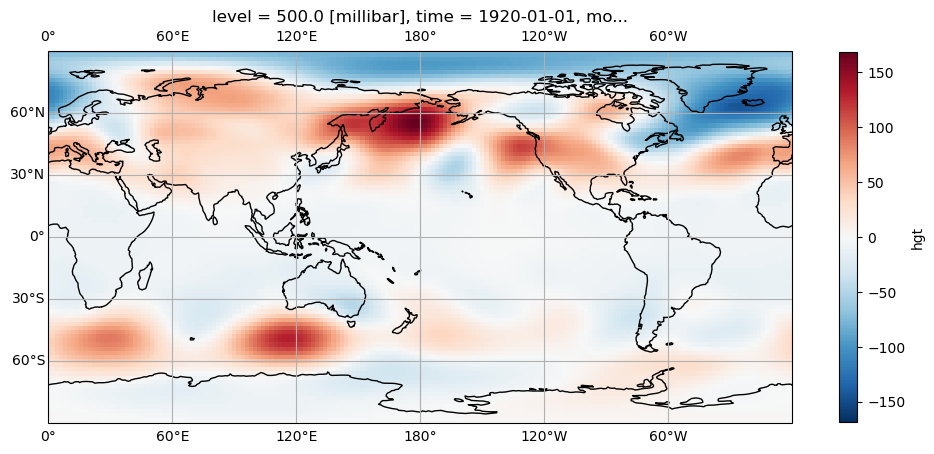

In [17]:
cmap_plot3 = (hgt500_anoms.sel(time='1920-01-01').
             plot(figsize=(12, 8),
                  cmap='RdBu_r',
                  transform=ccrs.PlateCarree(),
                  subplot_kws={'projection': ccrs.PlateCarree(central_longitude=180)},
                  cbar_kwargs={'shrink': 0.6}))

cmap_plot3.axes.coastlines()
# add gridlines with labels
cmap_plot3.axes.gridlines(draw_labels=True)

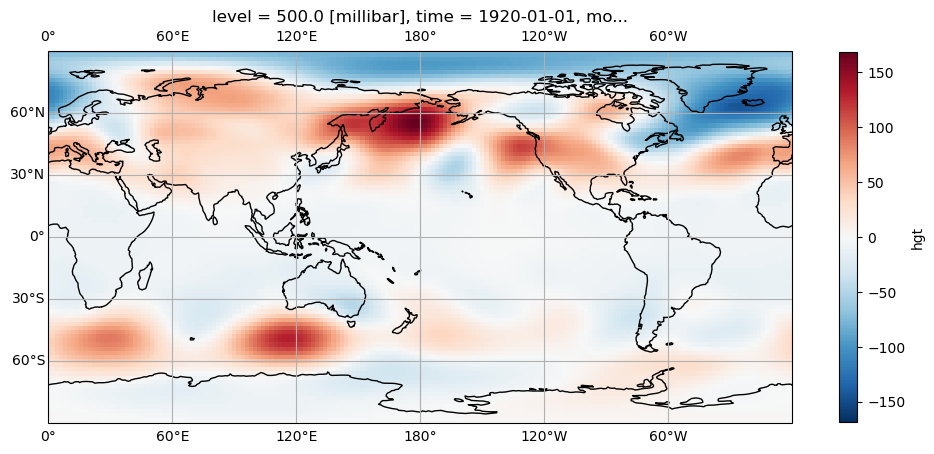

In [18]:
cmap_plot3 = (hgt500_anoms.sel(time='1920-01-01').
             plot(figsize=(12, 8),
                  cmap='RdBu_r',
                  transform=ccrs.PlateCarree(),
                  subplot_kws={'projection': ccrs.PlateCarree(central_longitude=180)},
                  cbar_kwargs={'shrink': 0.6}))

cmap_plot3.axes.coastlines()
# add gridlines with labels
cmap_plot3.axes.gridlines(draw_labels=True)

#### With Symmetric Logarithm Scale

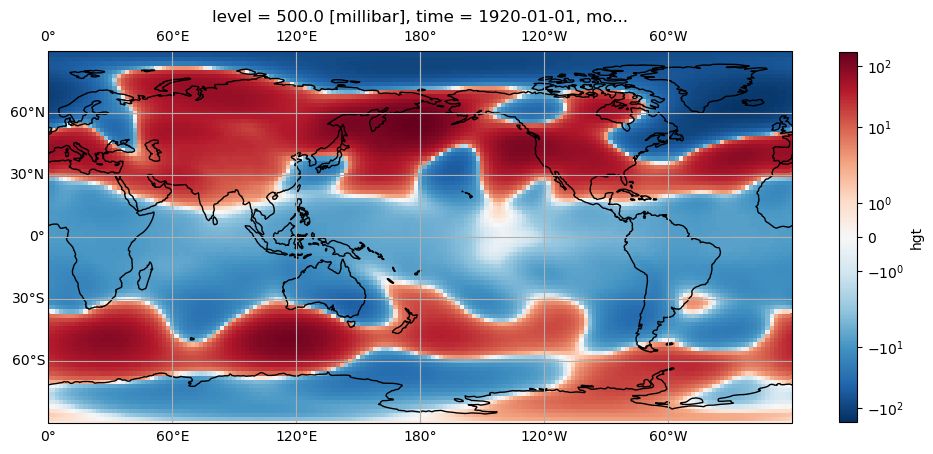

In [22]:
# SymLogNorm is linear under linthresh and logarithmic in the positive and negative direction
# over linthresh
cmap_plot4 = (hgt500_anoms.sel(time='1920-01-01').
             plot(figsize=(12, 8),
                  cmap='RdBu_r',
                  norm=mpl.colors.SymLogNorm(linthresh=2),
                  transform=ccrs.PlateCarree(),
                  subplot_kws={'projection': ccrs.PlateCarree(central_longitude=180)},
                  cbar_kwargs={'shrink': 0.6}))

cmap_plot4.axes.coastlines()
# add gridlines with labels
cmap_plot4.axes.gridlines(draw_labels=True)

#### Self-defined Buckets for Discrete Colorbar

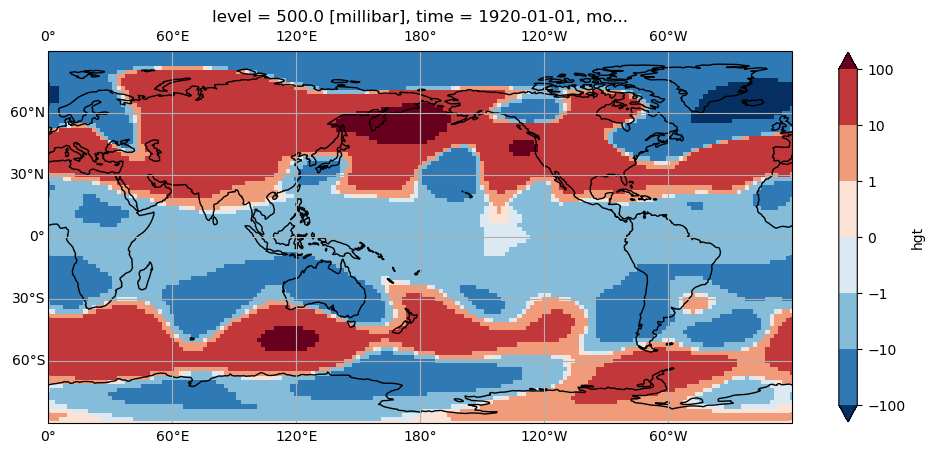

In [24]:
bounds = [-10**2, -10, -1, 0, 1, 10, 10**2]
cmap = mpl.cm.RdBu_r
norm = mpl.colors.BoundaryNorm(bounds, cmap.N, extend='both')

cmap_plot5 = (hgt500_anoms.sel(time='1920-01-01').
             plot(figsize=(12, 8),
                  cmap=cmap,
                  norm=norm,
                  transform=ccrs.PlateCarree(),
                  subplot_kws={'projection': ccrs.PlateCarree(central_longitude=180)},
                  cbar_kwargs={'shrink': 0.6}))

cmap_plot5.axes.coastlines()
# add gridlines with labels
cmap_plot5.axes.gridlines(draw_labels=True)

### Sometimes Xarray Plotting Isn't Convenient

In [30]:
loglik_da = xr.open_dataset('/home/data/projects/NA_precip_extremes/optimized_transform_loglik.nc')

loglik_da = loglik_da['loglik']

AIC_penalty = 2 * (5 + 1)
AIC_da = AIC_penalty - (2 * loglik_da)

AIC_diff = AIC_da - AIC_da.min(['offset', 'lam'])
AIC_diff = AIC_diff.rename('AIC_diff')

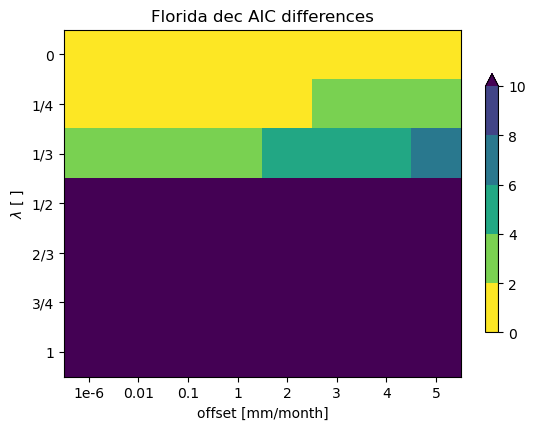

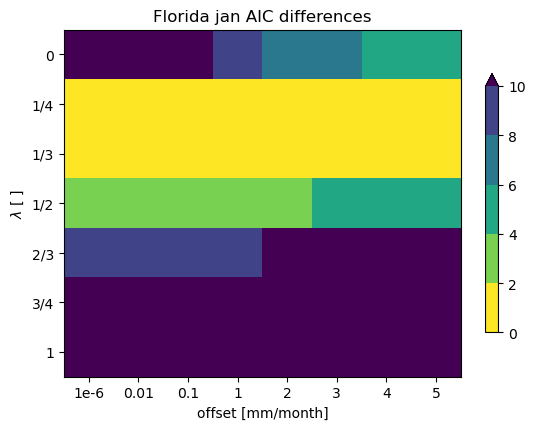

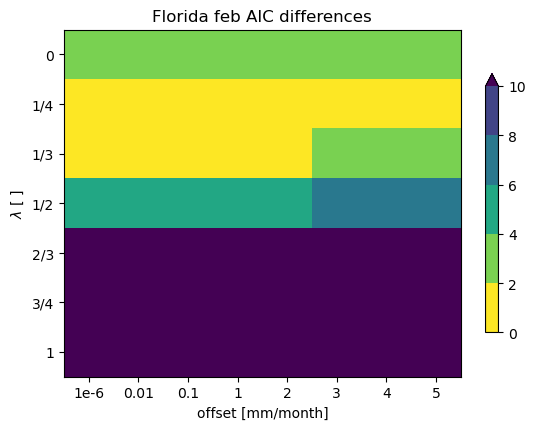

In [37]:
from matplotlib.cm import viridis_r
import calendar

# Manually create discrete colorbar for matplotlib
# To create this color scheme we need a cmap and a norm
cmap = viridis_r
bounds = [0, 2, 4, 6, 8, 10]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N, extend='max')

lam_labels = ['0', '1/4', '1/3', '1/2', '2/3', '3/4', '1']
off_labels = ['1e-6', '0.01', '0.1', '1', '2', '3', '4', '5']

loc_name = 'Florida'

test_lat = 28
test_lon = -82

AIC_local = AIC_diff.sel(lat=test_lat, lon=test_lon, method='nearest')
for i in [12, 1, 2]:
    month_abrv = calendar.month_abbr[i].lower()
    AIC_np = AIC_local.sel(month=i).values
    fig, ax = plt.subplots()
    ax.imshow(AIC_np, cmap=cmap, norm=norm)
    fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax, shrink=0.7)
    plot_title = loc_name + ' ' + month_abrv + ' AIC differences'
    ax.set_title(plot_title)
    # Note we can use Latex labels with raw strings!!
    ax.set_ylabel(r'$\lambda$ [ ]')
    ax.set_xlabel('offset [mm/month]')
    ax.set_yticks(ticks=np.arange(len(lam_labels)), labels=lam_labels)
    ax.set_xticks(ticks=np.arange(len(off_labels)), labels=off_labels)